# Import Libraries

In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
path = 'xxxxxx' #enter your path here
df  = pd.read_csv(path)

In [4]:
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [19]:
def gender_mapper(row):
    """encode the gender category"""
    if row == 'Male':
        row = 0
    else:
        row = 1
    return row

df['Gender'] = df['Gender'].apply(gender_mapper)

In [21]:
df.shape

(709, 8)

<AxesSubplot:xlabel='Gender', ylabel='count'>

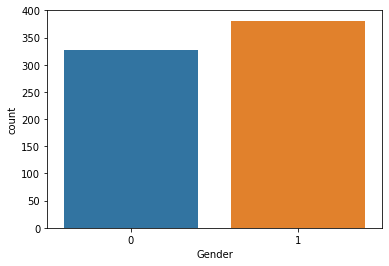

In [53]:
sns.countplot(data = df, x = 'Gender')

<AxesSubplot:xlabel='Age', ylabel='Density'>

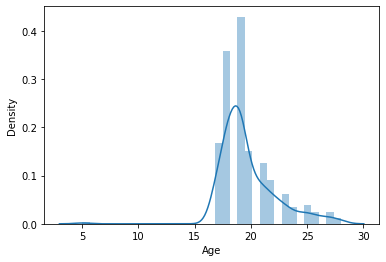

In [64]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Personality (Class label)', ylabel='count'>

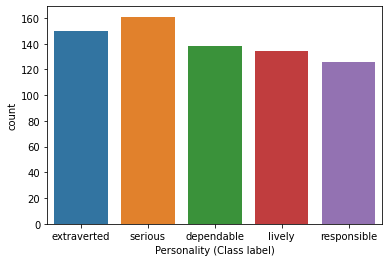

In [11]:
sns.countplot(data = df, x = 'Personality (Class label)')

In [12]:
df.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

In [23]:
y = df['Personality (Class label)']
X = df.drop('Personality (Class label)', axis = 1)
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (709, 7)
shape of y =  (709,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (567, 7)
shape of y_train =  (567,)
shape of X_test =  (142, 7)
shape of y_test =  (142,)


# Train a simple model

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [35]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Save Ml Model

In [37]:
import joblib
joblib.dump(tree, "baseline_personality.pkl")

['baseline_personality.pkl']

In [66]:
model = joblib.load("baseline_personality.pkl")

In [69]:
model.predict([[0, 17, 7, 4, 7, 3, 2]])[0]

'extraverted'